In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import pandas as pd
from IPython.display import display
import os
from pprint import pprint

directory = os.path.normpath("C:\\Users\\akira\\Documents\\GitHub\\COMP30024\\Chexers\\Part B\\code\\Chexers\\logs")

blue_random_0.txt empty file. game quit unexpectedly (usually a keyboard interrupt)
blue_random_17.txt empty file. game quit unexpectedly (usually a keyboard interrupt)
INVALID ACTION green_random_7.txt !!!!


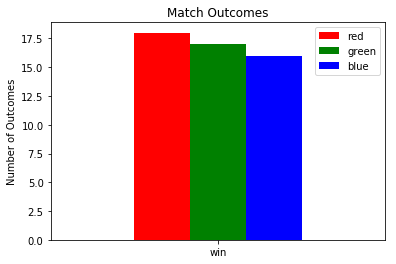

AGENT DRAW RATE
Counter()

AGENT LOSS RATE
Counter()

GAME LOST AS COLOUR
{'blue': [], 'green': [], 'red': []}

AGENT OVER 60 SECOND MATCHES
Counter()

GAME OVERTIME AS COLOUR
{'blue': [], 'green': [], 'red': []}


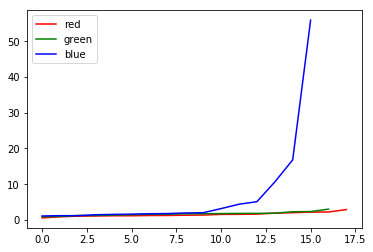

In [18]:
count = {'red': defaultdict(int), 'green': defaultdict(int), 'blue': defaultdict(int)}
losses = {'red': list(), 'green': list(), 'blue': list()}
loss_number = {'red': list(), 'green': list(), 'blue': list()}
draws = {'red': list(), 'green': list(), 'blue': list()}
time = {'red': list(), 'green': list(), 'blue': list()}
overtime = {'red': list(), 'green': list(), 'blue': list()}
overtime_number = {'red': list(), 'green': list(), 'blue': list()}

for directory, subdirectories, files in os.walk('.'):
    if len(files) < 11:
        continue
    try:
        colour = files[0].split('_')[0]
    except:
        continue
    for file in files:
        agent = file.split('_')[1]
        game_number = int(file.split('_')[2][:-4])
        try:
            f = pd.read_csv(os.path.join(directory, file),sep='\n')
        except:
            print(file,"empty file. game quit unexpectedly (usually a keyboard interrupt)")
            continue
        try:
            match_time = float(''.join(list(f.columns[0])[6:]))
        except:
            print(f"INVALID ACTION {file} !!!!")
            continue
        time[colour].append(match_time)
        if match_time >= 60:
            overtime[colour].append(agent)
            overtime_number[colour].append(game_number)
        if 'game state occurred 4 times' in ''.join(f.values[0][0]):
            draws[colour].append(agent)
            count[colour]['draw'] += 1
        elif colour in f.values[0][0].casefold():
            count[colour]['win'] += 1
        else:
            losses[colour].append(agent)
            count[colour]['loss'] += 1
            loss_number[colour].append(game_number)
            
pd.DataFrame().from_dict(count).plot.bar(color=['r','g','b'])
plt.title("Match Outcomes")
plt.ylabel("Number of Outcomes")
plt.xticks(rotation=0)
plt.show()

# sort time for a nice graph :)
for i in time.keys():
    time[i].sort()


pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in time.items() ])).plot(color=['r','g','b'])

print("AGENT DRAW RATE")
pprint(Counter([b for a in draws.values() for b in a]))
print("\nAGENT LOSS RATE")
pprint(Counter([b for a in losses.values() for b in a]))
print("\nGAME LOST AS COLOUR")
pprint(loss_number)
print("\nAGENT OVER 60 SECOND MATCHES")
pprint(Counter([b for a in overtime.values() for b in a]))
print("\nGAME OVERTIME AS COLOUR")
pprint(overtime_number)